In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz as sv
import IPython 

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#reading csv file

data_income=pd.read_csv('E:\\NPTEL project\\nptel 1\\income(1).csv')


In [14]:
#copying csv file into other data frame

data=data_income

In [4]:
# Performing EDA
# 1) Getting to know the data
# 2)Data cleaning
# 3)visualisation

In [5]:
# DATA CHECKING
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [6]:
data.tail()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31977,29,Private,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,"less than or equal to 50,000"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [8]:
data.shape

(31978, 13)

In [9]:
data.isnull().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [10]:
data.describe(include='O')  #For categorical variables

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,31978,31978,31978,31978,31978,31978,31978,31978,31978
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [11]:
data.describe() # For integer variables

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [12]:
print(np.unique(data['JobType']))   # checking for unique and missing values
data.value_counts('JobType')

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']


JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
dtype: int64

In [13]:
print(np.unique(data['occupation']))   # checking for unique and missing values
data.value_counts('occupation')

[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
dtype: int64

In [14]:
print(np.unique(data['EdType']))   # checking for unique and missing values
data.value_counts('EdType')

[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']


EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
dtype: int64

In [15]:
data=pd.read_csv('E:\\NPTEL project\\nptel 1\\income(1).csv',na_values=[" ?"])  # Reading also the missing values
data.shape


(31978, 13)

In [16]:
# Data Pre Processing by removing unwanted values

In [17]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [18]:
missing=data[data.isnull().any(axis=1)] #checking if any coloums has missing values
missing.shape


(1816, 13)

In [19]:
# missing columns=1816
# missing rows=13

In [20]:
data.dropna(axis=0) # dropping all the rows having missing values

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [21]:
data.corr() # checking co-relation between two integer type variables

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.077490,0.057282,0.068299
capitalgain,0.077490,1.000000,-0.031499,0.079112
capitalloss,0.057282,-0.031499,1.000000,0.053106
hoursperweek,0.068299,0.079112,0.053106,1.000000


In [22]:
pd.crosstab(index=data['gender'],
             columns='count',normalize=True)  #checking co-relation of two categorical variables

col_0,count
gender,
Female,0.331728
Male,0.668272


In [23]:
data.groupby('gender')['race'].value_counts()


gender   race               
 Female   White                  8540
          Black                  1523
          Asian-Pac-Islander      324
          Amer-Indian-Eskimo      119
          Other                   102
 Male     White                 18890
          Black                  1505
          Asian-Pac-Islander      632
          Amer-Indian-Eskimo      192
          Other                   151
Name: race, dtype: int64

In [24]:
pd.crosstab(index=data['gender'],columns=data['age']) # checking relation between age and gender

age,17,18,19,20,21,22,23,24,25,26,...,80,81,82,83,84,85,86,87,88,90
gender,,,,,,,,,,,,,,,,,,,,,
Female,185,264,353,356,326,338,359,297,312,285,...,5,8,2,1,4,1,1,0,1,14
Male,208,278,354,387,383,415,512,487,518,482,...,17,10,10,5,6,2,0,1,2,28


In [25]:
pd.crosstab(index=data['gender'],columns=data['JobType']) #checking relation between jobtype and gender

JobType,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
gender,,,,,,,,
Female,309,824,2,7642,126,392,484,5
Male,634,1243,5,14644,948,2107,795,9


In [26]:
pd.crosstab(index=data['gender'],columns=data['SalStat'])  #checking relation between gender and salary status

SalStat,"greater than 50,000","less than or equal to 50,000"
gender,,
Female,1162,9446
Male,6533,14837


In [11]:
analyse_rep=sv.analyze(data)
analyse_rep.show_html('data.html',open_browser=True)


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


c:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='count'>

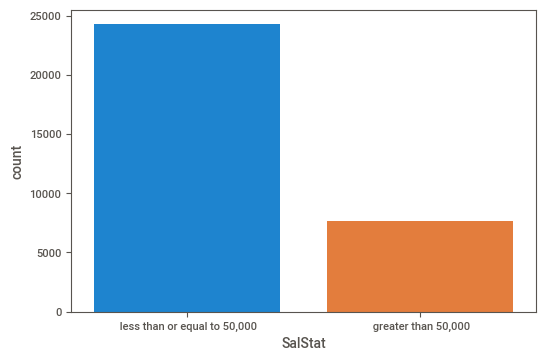

In [17]:
sns.countplot(data['SalStat'])

c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

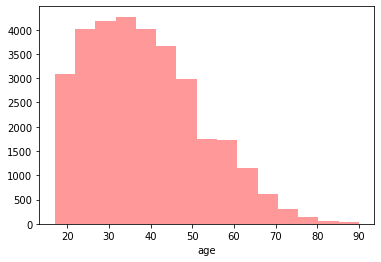

In [28]:
sns.distplot(data['age'],bins=15,kde=False,color='red')

c:\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalStat', ylabel='age'>

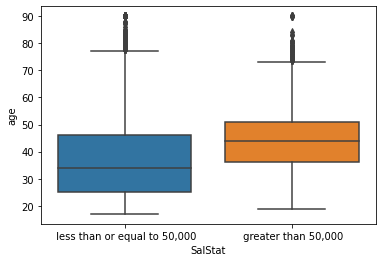

In [29]:
sns.boxplot('SalStat','age',data=data)

<AxesSubplot:xlabel='JobType', ylabel='age'>

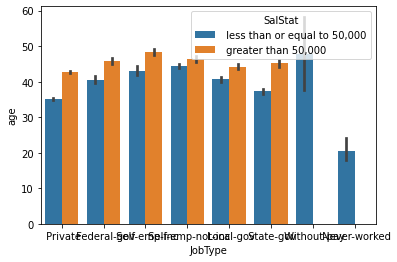

In [30]:
sns.barplot(x="JobType",y="age",hue="SalStat",data=data)

In [31]:
pd.crosstab(index=data['EdType'],columns=data['SalStat'],normalize=False)

SalStat,"greater than 50,000","less than or equal to 50,000"
EdType,,
10th,61,860
11th,59,1108
12th,31,386
1st-4th,6,157
5th-6th,14,304
7th-8th,37,590
9th,26,480
Assoc-acdm,262,793
Assoc-voc,357,1009


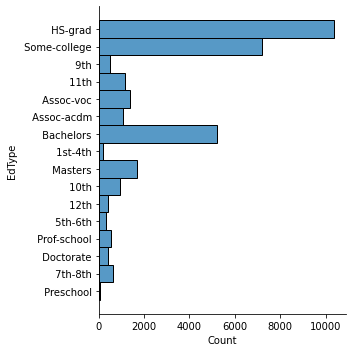

In [32]:
sns.displot(y=data['EdType'],bins=6)

In [33]:
pd.crosstab(index=data['occupation'],columns=data['SalStat'],normalize=False)

SalStat,"greater than 50,000","less than or equal to 50,000"
occupation,,
Adm-clerical,498,3223
Armed-Forces,1,8
Craft-repair,908,3122
Exec-managerial,1937,2055
Farming-fishing,115,874
Handlers-cleaners,83,1267
Machine-op-inspct,245,1721
Other-service,132,3080
Priv-house-serv,1,142


c:\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capitalgain'>

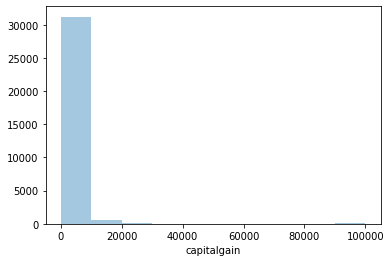

In [34]:
sns.distplot(data['capitalgain'],bins=10,kde=False) #98% people have capital gain as 0

<AxesSubplot:xlabel='capitalloss'>

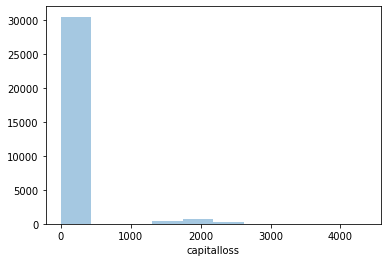

In [35]:
sns.distplot(data['capitalloss'],bins=10,kde=False)  # 98% people have capital loss as 0

<AxesSubplot:xlabel='SalStat', ylabel='hoursperweek'>

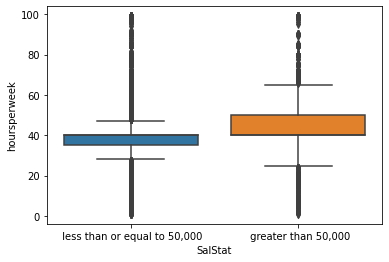

In [36]:
sns.boxplot(x='SalStat',y='hoursperweek',data=data)

In [37]:
y_c=data.groupby('race')['nativecountry'].value_counts().reset_index(name='counts')


fig = px.choropleth(y_c, locations="nativecountry", color="counts", 
                    locationmode='country names',
                    animation_frame='race',
                    range_color=[0,100])

fig.show()

In [44]:
data.head(5)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [ ]:
# Applying machine learning algorithm


In [49]:
#Applying Logistic regression for predicting the probability
data.SalStat.replace(['less than or equal to 50,000','greater than 50,000'],[0,1],inplace=True)


In [53]:
new_data=pd.get_dummies(data,drop_first=True) #converting all the categorical variables into 0's 0r 1's
new_data.head()

,age,capitalgain,capitalloss,hoursperweek,JobType_ Local-gov,JobType_ Never-worked,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,"SalStat_ less than or equal to 50,000"
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,44,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [64]:
# storing all the columns names
column_name=list(new_data.columns)
print(column_name)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'JobType_ Local-gov', 'JobType_ Never-worked', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation

In [80]:
features=list(set(column_name)-set(['SalStat'])) # excluding depandant variable
print(features)

['EdType_ 5th-6th', 'nativecountry_ Trinadad&Tobago', 'nativecountry_ England', 'nativecountry_ Hong', 'EdType_ Doctorate', 'occupation_ Craft-repair', 'nativecountry_ Germany', 'nativecountry_ France', 'nativecountry_ Outlying-US(Guam-USVI-etc)', 'nativecountry_ Yugoslavia', 'nativecountry_ Holand-Netherlands', 'nativecountry_ China', 'nativecountry_ Hungary', 'nativecountry_ Iran', 'maritalstatus_ Married-spouse-absent', 'relationship_ Own-child', 'nativecountry_ Mexico', 'nativecountry_ Cuba', 'nativecountry_ Thailand', 'nativecountry_ Jamaica', 'JobType_ Self-emp-not-inc', 'occupation_ Exec-managerial', 'age', 'JobType_ Never-worked', 'occupation_ Priv-house-serv', 'nativecountry_ India', 'EdType_ HS-grad', 'EdType_ 12th', 'nativecountry_ Guatemala', 'EdType_ Preschool', 'EdType_ 9th', 'EdType_ Prof-school', 'nativecountry_ El-Salvador', 'occupation_ Other-service', 'nativecountry_ Dominican-Republic', 'EdType_ Bachelors', 'race_ Asian-Pac-Islander', 'race_ White', 'EdType_ 7th-8th

In [114]:
y=new_data['SalStat_ less than or equal to 50,000'].values
print(y)

[1 1 0 ... 1 1 1]


In [115]:
x=new_data[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [116]:
# splitting the data into several types
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)


In [89]:
train_a.shape

(22384,)

In [90]:
train_b.shape

(22384, 96)

In [91]:
test_a.shape

(9594,)

In [92]:
test_b.shape

(9594, 96)

In [117]:
# Applying logistic regression 
Logistic=LogisticRegression()

In [118]:
Logistic.fit(train_x,train_y)

c:\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [119]:
Logistic.coef_

array([[ 1.61877320e-01,  9.29178031e-03, -1.47075324e-02,
         1.02459149e-02, -3.28569081e-01, -9.45898977e-03,
        -4.88684712e-03, -1.03686567e-02,  4.91706842e-03,
         8.28109415e-04,  1.32843623e-03,  4.57694006e-02,
         2.06022331e-03,  1.31587825e-02,  4.77144256e-02,
         1.79356773e+00,  2.90825540e-01,  2.65961775e-02,
         1.92733505e-02,  3.78669740e-02,  8.37719765e-01,
        -1.00936637e+00, -6.22912491e-02,  3.24491554e-03,
         5.58530028e-02,  4.05394497e-02,  9.36984296e-01,
         1.62016367e-01,  6.06475619e-03,  4.21330236e-02,
         2.09693463e-01, -3.40613427e-01,  4.16880315e-02,
         9.28316973e-01,  4.02924586e-02, -7.97883265e-01,
         3.38484897e-01, -9.92017544e-02,  3.77649976e-01,
        -6.12111552e-01,  3.60614829e-01, -2.24567645e-01,
         9.24052810e-03,  5.10498513e-02,  4.14770025e-01,
        -3.52478698e-02,  5.37894224e-01,  8.14966716e-03,
        -3.62314960e-02,  1.38653389e+00,  1.11842261e-0

In [120]:
Logistic.intercept_

array([0.98573209])

In [124]:
predict=Logistic.predict(test_x) # predicting the x data
print(predict)

[1 1 0 ... 1 1 1]


In [125]:
confusion=confusion_matrix(test_y, predict) #diagonal values shows that they are correctly predicted values,vice versa
print(confusion)

[[2257    1]
 [   2 7334]]


In [126]:
accuracy=accuracy_score(test_y,predict)
print(accuracy)

0.9996873045653534


In [148]:
print("Missclassifiers: %d" % (test_y!=predict).sum())

Missclassifiers: 3


[1708567191464.4043, 213674844763.58026, 54862088693.91087, 23587900435.19236, 15103863549.876343, 8905006884.318882, 3931220743.849022, 3013922061.407593, 2049366935.3484688, 1482400604.7129006]


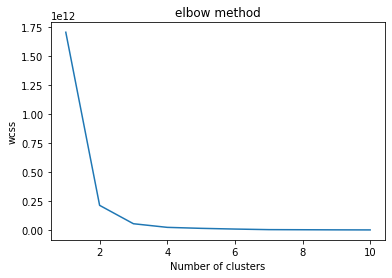

In [132]:
# Finding The clusters by elbow method
wcss=[]
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)

print(wcss)
plt.plot(range(1, 11), wcss)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [150]:
# k neighbours classifier
KNN=KNeighborsClassifier(n_neighbors=5)

In [151]:
KNN.fit(train_x,train_y)


KNeighborsClassifier()

In [154]:
predict=KNN.predict(test_x)
print(predict)

[1 1 0 ... 1 1 1]


In [155]:
confusion=confusion_matrix(test_y, predict) #diagonal values shows that they are correctly predicted values,vice versa
print(confusion)

[[1861  397]
 [ 214 7122]]


In [157]:
accuracy=accuracy_score(test_y,predict)
print(accuracy)

0.9363143631436315


In [158]:
print("Missclassifiers: %d" % (test_y!=predict).sum())

Missclassifiers: 611


In [159]:
# effect of k in classifiers
Misclassified_sample = []
# Calculating error for K values between 1 and 20
for i in range(1, 20):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

print(Misclassified_sample)

[740, 858, 623, 662, 611, 619, 585, 604, 597, 588, 616, 593, 613, 602, 614, 595, 609, 590, 614]


In [160]:
#  By looking at this models 
# Logistic regression gave the best result with 99% accuracy by having only 3 missclassifies values
# Whereas K classifier has 611 and the best one is 585
